<a href="https://colab.research.google.com/github/zahra-niazi/ml-kernel-perceptron/blob/main/perceptron_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**DATA IMPORT**

In [ ]:
import pandas as pd
train = pd.read_csv('/content/gdrive/MyDrive/perceptron/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/perceptron/test.csv')

In [ ]:
train.shape

(103904, 25)

In [ ]:
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
train.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
test.shape

(25976, 25)

In [ ]:
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)
test.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [ ]:
# Replace spaces in the column names with underscore
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

In [ ]:
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

Data Visualization





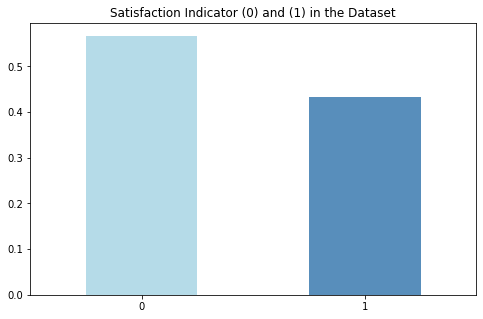

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

CHECK FOR MISSING DATA

In [ ]:
# Missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

DEAL WITH CATEGORICAL ATTRIBUTES

In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])


lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

In [ ]:
train.head(10)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,0,0,26,1,1,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,1,0,47,1,1,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
7,0,0,52,0,0,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,1
8,0,0,41,0,0,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,0
9,1,1,20,0,1,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,0



**BUILDING PERCEPTRON MODEL**

In [ ]:
X_train = train.drop(['satisfaction'], axis=1)
y_train = train['satisfaction'].to_numpy()

X_test = test.drop(['satisfaction'], axis=1)
y_test = test['satisfaction'].to_numpy()

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

model = Perceptron(max_iter=100)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print(classification_report(y_test,y_pred,digits=5))


Accuracy = 0.8150215583615645
              precision    recall  f1-score   support

           0    0.82933   0.84396   0.83658     14573
           1    0.79598   0.77804   0.78691     11403

    accuracy                        0.81502     25976
   macro avg    0.81266   0.81100   0.81174     25976
weighted avg    0.81469   0.81502   0.81478     25976



VISUALIZE RESULTS

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Heatmap Visualization Parameters
def visualize_confusion_matrix(conf):
    group_names = ['Correctly satisfied', 'Predicted satisfied while not', 'Predicted dissatisfied while not', 'Correctly dissatisfied']
    group_counts = [value for value in conf.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in conf.flatten() / np.sum(conf)]

    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(conf, annot=labels, fmt='', cmap='Blues')

[12299  2274  2531  8872]


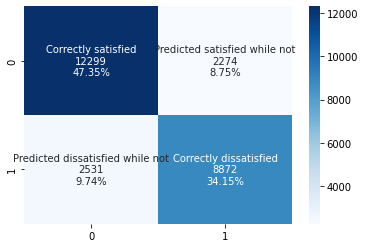

In [ ]:
per_opt_conf = confusion_matrix(y_test, y_pred)
print(per_opt_conf.flatten())
visualize_confusion_matrix(per_opt_conf)

**Kernel Perceptron**

در اینجا برای اینکه پرسپترون بتواند داده های غیرخطی را نیز پردازش کند، چون به دلیل وجود ضرب داخلی هنگام محاسبه وزن ها این امر ممکن نبود، از کرنل ها استفاده  میکنیم: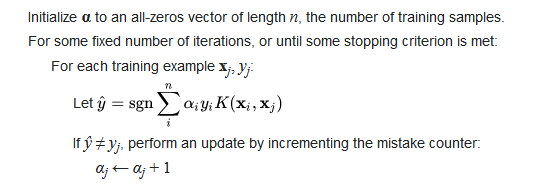

از فرمول بالا استفاده کرده و تابع فیت که قرار است آموزش مدل ما را انجام دهد، تغییر می دهیم.

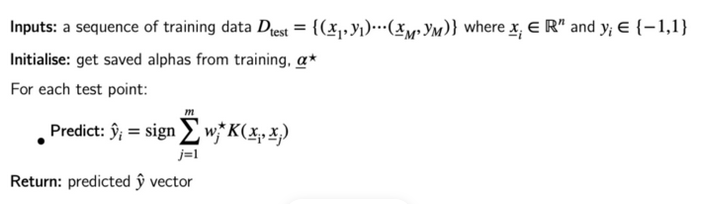

برای تست هم طبق الگوریتم بالا پیش رفته و تایع پردیکت را مینویسیم.

In [ ]:
def polynomial_kernel(x, y, p=3):
  return (1 + np.dot(x, y)) ** p

In [ ]:
class KernelPerceptron(object):
    def __init__(self,max_iter=1):
        self.kernel = polynomial_kernel
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)
        for t in range(self.max_iter):
          for j in range(n_samples):
            sum = 0
            for i in range(len(X)):
              sum += self.alpha[i] * y[i] * self.kernel(X[i] , X[j])
            yHat = np.sign(sum)
            if (yHat != y[j]):
              self.alpha[j] += 1

        #tough = self.alpha > 1e-5
        #self.alpha = self.alpha[tough]
        print(self.alpha)
        self.x = X
        self.y = y
        print(self.x)
        print(self.y)
        
    def predict(self, X):
     # X = np.atleast_2d(X)
      y_pred = np.zeros(len(X))
      for i in range(len(X)):
        sum=0
        for alpha, y, x in zip(self.alpha, self.y, self.x):
          sum += alpha * y * self.kernel(X[i],x)
        print(sum)
        if (sum<2000):
          sum = 0
        print(sum)
        y_pred[i] = sum
      return np.sign(y_pred)

In [ ]:
kp_model = KernelPerceptron(max_iter=100)

kp_model.fit(X_train[:300],y_train[:300])
kp_y_pred = kp_model.predict(X_test[:300])


print(y_test[:300])
print(kp_y_pred)


accuracy = accuracy_score(y_test[:300], kp_y_pred)
print("Accuracy = {}".format(accuracy))
print(classification_report(y_test[:300],kp_y_pred,digits=5))

[ 95  65  20 120]


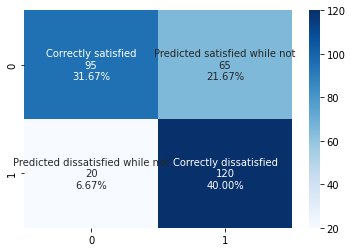

In [ ]:
per_opt_conf = confusion_matrix(y_test[:300], kp_y_pred)
print(per_opt_conf.flatten())
visualize_confusion_matrix(per_opt_conf)

dataset links:

*   https://www.kaggle.com/code/chandrimad31/flight-passenger-satisfaction-eda-and-prediction#Label-Encoding-of-Categorical-Variables
*   https://www.kaggle.com/code/kyriakospanagiotidis/mlp-and-svm-in-airline-passenger-satisfaction#Introduction-to-Dataset


*   https://www.kaggle.com/code/amandamagzal/airline-passenger-satisfaction-analysis#6-Regression-




kernel perceptron links:
*   https://towardsdatascience.com/implementing-an-efficient-generalised-kernel-perceptron-in-pytorch-9e9fa6b30761



*   https://github.com/namiyousef/MLFirstPrinciples


*   https://gist.github.com/mblondel/656147
*   https://en.wikipedia.org/wiki/Kernel_perceptron

*   https://github.com/topics/kernel-perceptron







